<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/Text_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install selenium

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [38]:
iphone_14=[]

In [39]:
for i in range (1,41):
    apple=[]
    url="https://www.amazon.in/Apple-iPhone-14-128GB-Blue/product-reviews/B0BDK62PDX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        apple.append(reviews[i].text)
    iphone_14=iphone_14+apple

In [40]:
iphone_14

['\nAbout the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app store. If you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. They publish best application and the way the apps, its modules switches is just flawless. Due to the so called strict policy of privacy program with Apple products, iPhone can pop up a box in your screen if any apps wants to track your activity with other applications. 

In [41]:
len(iphone_14)

250

In [42]:
rev={"review":iphone_14}

In [43]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [44]:
review_data

,review
0,"\nAbout the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app store. If you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. They publish best application and the way the apps, its modules switc..."
1,\nBuying an iphone with my first salary is the dream i manifested it and it happened. I’m writing this review after 8 months. Camera quality everything is good. There is nothing to say about iphone the best always ❤️. But what i observed is after IOS 17 battery started to drain like for 2 days one percent is dropping after that it stopped.Now my battery health is 93%. This is the only concern with iphone remaining all aspects it is worth the money.\n
2,"\nPros: Good Looking (4/5): The Blue color variant adds to the aesthetic appeal, making the iPhone 14 an eye-catching device. Better than iPhone 12 (4/5): The iPhone 14 exhibits improvements over the iPhone 12, contributing to an enhanced user experience. Good Camera (4/5): The camera performance is commendable, capturing high-quality images and enhancing the overall photography experience.In summary, the Apple iPhone 14 in Blue is a solid choice, offering a sleek design, improved features compared to the iPhone 12, and a reliable camera for capturing memorable moments.\n"
3,\nGood product\n
4,\nFirst time iPhone user like me amazed by iPhone 14. Its battery to camera and security settings are amazing. Go for iPhone 14 than other model. Prize and features …\n
...,...
245,\n.\n
246,\nSafely delivered\n
247,\nBattery backup No good long time 🤔\n
248,\nIt’s a good phone but don’t think that it’s perfect. It has its own problems.\n


In [45]:
text=" ".join(review_data)

In [46]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text))
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text))
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text))

    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [47]:
review_data

,review
0,"\nabout the phoneapple phone without a second delay, i would say it is better than all android phones i have used. the phone is like water, it flows in a way you want and shaping in your way. in a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that i have seen in android.why it is better than android?you pay too much money for apple products, obviously you experience the features, physical components , camera lens etc. apart from basic things, you can also enjoy the best applications available in app store. if you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. they publish best application and the way the apps, its modules switc..."
1,\nbuying an iphone with my first salary is the dream i manifested it and it happened. i’m writing this review after 8 months. camera quality everything is good. there is nothing to say about iphone the best always ❤️. but what i observed is after ios 17 battery started to drain like for 2 days one percent is dropping after that it stopped.now my battery health is 93%. this is the only concern with iphone remaining all aspects it is worth the money.\n
2,"\npros: good looking (4/5): the blue color variant adds to the aesthetic appeal, making the iphone 14 an eye-catching device. better than iphone 12 (4/5): the iphone 14 exhibits improvements over the iphone 12, contributing to an enhanced user experience. good camera (4/5): the camera performance is commendable, capturing high-quality images and enhancing the overall photography experience.in summary, the apple iphone 14 in blue is a solid choice, offering a sleek design, improved features compared to the iphone 12, and a reliable camera for capturing memorable moments.\n"
3,\ngood product\n
4,\nfirst time iphone user like me amazed by iphone 14. its battery to camera and security settings are amazing. go for iphone 14 than other model. prize and features …\n
...,...
245,\n.\n
246,\nsafely delivered\n
247,\nbattery backup no good long time 🤔\n
248,\nit’s a good phone but don’t think that it’s perfect. it has its own problems.\n


In [48]:
text=" ".join(review_data["review"])
text

'\nabout the phoneapple phone without a second delay, i would say it is better than all android phones i have used. the phone is like water, it flows in a way you want and shaping in your way. in a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that i have seen in android.why it is better than android?you pay too much money for apple products, obviously you experience the features, physical components , camera lens etc. apart from basic things, you can also enjoy the best applications available in app store. if you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. they publish best application and the way the apps, its modules switches is just flawless. due to the so called strict policy of privacy program with apple products, iphone can pop up a box in your screen if any apps wants to track your activity with other applications. +

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
text_tokens = word_tokenize(text)
text_tokens

['about',
 'the',
 'phoneapple',
 'phone',
 'without',
 'a',
 'second',
 'delay',
 ',',
 'i',
 'would',
 'say',
 'it',
 'is',
 'better',
 'than',
 'all',
 'android',
 'phones',
 'i',
 'have',
 'used',
 '.',
 'the',
 'phone',
 'is',
 'like',
 'water',
 ',',
 'it',
 'flows',
 'in',
 'a',
 'way',
 'you',
 'want',
 'and',
 'shaping',
 'in',
 'your',
 'way',
 '.',
 'in',
 'a',
 'best',
 'way',
 'possible',
 ',',
 'the',
 'phone',
 'is',
 'designed',
 'to',
 'only',
 'show',
 'what',
 'the',
 'user',
 'wants',
 'and',
 'eliminating',
 'unnecessary',
 'ads',
 ',',
 'features',
 'that',
 'i',
 'have',
 'seen',
 'in',
 'android.why',
 'it',
 'is',
 'better',
 'than',
 'android',
 '?',
 'you',
 'pay',
 'too',
 'much',
 'money',
 'for',
 'apple',
 'products',
 ',',
 'obviously',
 'you',
 'experience',
 'the',
 'features',
 ',',
 'physical',
 'components',
 ',',
 'camera',
 'lens',
 'etc',
 '.',
 'apart',
 'from',
 'basic',
 'things',
 ',',
 'you',
 'can',
 'also',
 'enjoy',
 'the',
 'best',
 'app

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [53]:
!pip install --upgrade scikit-learn
tf= TfidfVectorizer()
text_tf=tf.fit_transform(text_without_sw)
feature_names=tf.get_feature_names_out()
dense=text_tf.todense()
denselist=dense.tolist()

In [54]:
df=pd.DataFrame(denselist,columns=feature_names)
df

,10k,11th,12,13,14,14the,17,7k,93,activity,...,usb,user,variant,visually,vs,waste,water,why,worth,writing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
words_list=" ".join(df)

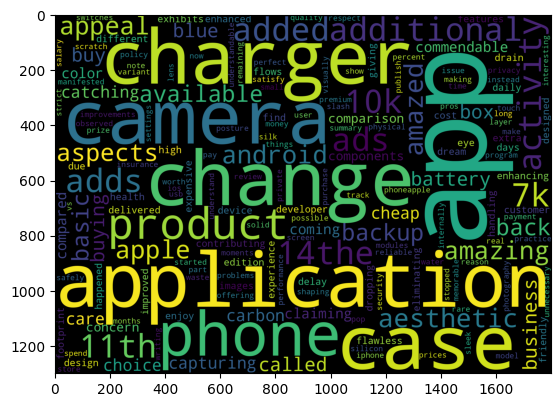

In [56]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [57]:
with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")

positive_words=positive_words[35:]

In [62]:
with open ("negative-words.txt", encoding='latin1') as nw:
    negative_words=nw.read().split("/n")

negative_words=negative_words[35:]

In [63]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [64]:
pos_text=" ".join([word for word in df if not word  in positive_words])

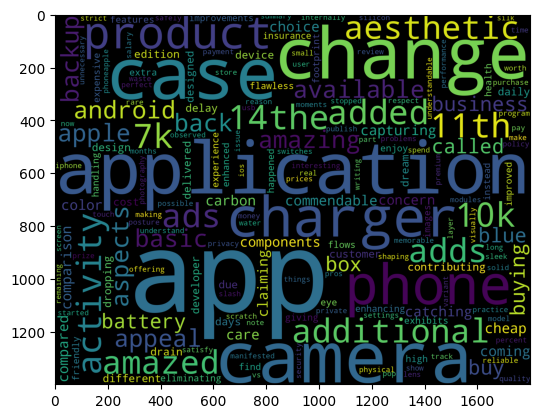

In [65]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

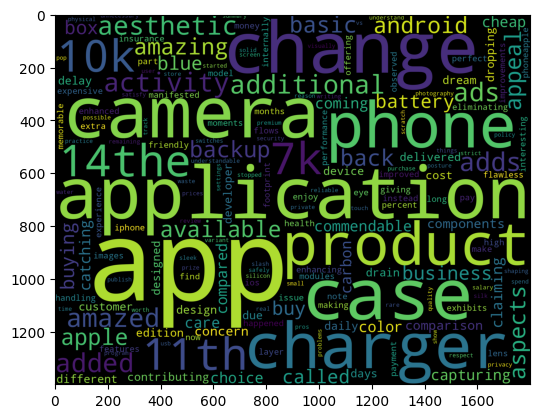

In [66]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [67]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"\nabout the phoneapple phone without a second delay, i would say it is better than all android phones i have used. the phone is like water, it flows in a way you want and shaping in your way. in a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that i have seen in android.why it is better than android?you pay too much money for apple products, obviously you experience the features, physical components , camera lens etc. apart from basic things, you can also enjoy the best applications available in app store. if you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. they publish best application and the way the apps, its modules switc...",0.412249,0.180500
1,\nbuying an iphone with my first salary is the dream i manifested it and it happened. i’m writing this review after 8 months. camera quality everything is good. there is nothing to say about iphone the best always ❤️. but what i observed is after ios 17 battery started to drain like for 2 days one percent is dropping after that it stopped.now my battery health is 93%. this is the only concern with iphone remaining all aspects it is worth the money.\n,0.466667,0.450000
2,"\npros: good looking (4/5): the blue color variant adds to the aesthetic appeal, making the iphone 14 an eye-catching device. better than iphone 12 (4/5): the iphone 14 exhibits improvements over the iphone 12, contributing to an enhanced user experience. good camera (4/5): the camera performance is commendable, capturing high-quality images and enhancing the overall photography experience.in summary, the apple iphone 14 in blue is a solid choice, offering a sleek design, improved features compared to the iphone 12, and a reliable camera for capturing memorable moments.\n",0.375000,0.300000
3,\ngood product\n,0.600000,0.700000
4,\nfirst time iphone user like me amazed by iphone 14. its battery to camera and security settings are amazing. go for iphone 14 than other model. prize and features …\n,0.536111,0.241667
...,...,...,...
245,\n.\n,0.000000,0.000000
246,\nsafely delivered\n,0.500000,0.500000
247,\nbattery backup no good long time 🤔\n,0.500000,-0.200000
248,\nit’s a good phone but don’t think that it’s perfect. it has its own problems.\n,0.866667,0.766667


In [68]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\nabout the phoneapple phone without a second delay, i would say it is better than all android phones i have used. the phone is like water, it flows in a way you want and shaping in your way. in a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that i have seen in android.why it is better than android?you pay too much money for apple products, obviously you experience the features, physical components , camera lens etc. apart from basic things, you can also enjoy the best applications available in app store. if you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. they publish best application and the way the apps, its modules switc...",0.412249,0.180500,Positive
1,\nbuying an iphone with my first salary is the dream i manifested it and it happened. i’m writing this review after 8 months. camera quality everything is good. there is nothing to say about iphone the best always ❤️. but what i observed is after ios 17 battery started to drain like for 2 days one percent is dropping after that it stopped.now my battery health is 93%. this is the only concern with iphone remaining all aspects it is worth the money.\n,0.466667,0.450000,Positive
2,"\npros: good looking (4/5): the blue color variant adds to the aesthetic appeal, making the iphone 14 an eye-catching device. better than iphone 12 (4/5): the iphone 14 exhibits improvements over the iphone 12, contributing to an enhanced user experience. good camera (4/5): the camera performance is commendable, capturing high-quality images and enhancing the overall photography experience.in summary, the apple iphone 14 in blue is a solid choice, offering a sleek design, improved features compared to the iphone 12, and a reliable camera for capturing memorable moments.\n",0.375000,0.300000,Positive
3,\ngood product\n,0.600000,0.700000,Positive
4,\nfirst time iphone user like me amazed by iphone 14. its battery to camera and security settings are amazing. go for iphone 14 than other model. prize and features …\n,0.536111,0.241667,Positive
...,...,...,...,...
245,\n.\n,0.000000,0.000000,Neutral
246,\nsafely delivered\n,0.500000,0.500000,Positive
247,\nbattery backup no good long time 🤔\n,0.500000,-0.200000,Negative
248,\nit’s a good phone but don’t think that it’s perfect. it has its own problems.\n,0.866667,0.766667,Positive


In [69]:
review_data['analysis'].value_counts()

analysis
Positive    175
Neutral      50
Negative     25
Name: count, dtype: int64